# Group 159 - 🐥 *(Front-Facing Baby Chick emoji)*
## Short Note 1 - Auto ML
Šimon Prasek - 105773
Karel Poncar - 105236
Miroslav Matějček - 105672


In [2]:
%load_ext autoreload

In [3]:
%autoreload

# load libraries
import pandas as pd
import numpy as np
import h2o
import sklearn
import sklearn.model_selection
import matplotlib 

from h2o.automl import H2OAutoML



This code was run for our best score (159.03). If you run it on your machine, there might be some differences. We tried to run it for a few times and even with the same seed we could not get the same result. This might be a thing with the used models. We have noticed that they change every day. 

We have also noticed that any type of basic work with data - removing columns, NaNs etc. made the MAE even worse.

In a long note we tried even using the first two best models as predictors but without it was better.

One of the used model interpretation is generated by H2O itself.

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,38 mins 33 secs
H2O_cluster_timezone:,Europe/Prague
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.2
H2O_cluster_version_age:,4 days
H2O_cluster_name:,H2O_from_python_mirek_0utjor
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,15.58 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


Training on dataset A
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
13:34:07.99: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
13:34:07.105: _train param, Dropping bad and constant columns: [snow_drift:idx, elevation:m]
██
13:34:17.481: _train param, Dropping bad and constant columns: [snow_drift:idx, elevation:m]

13:34:18.837: _train param, Dropping bad and constant columns: [snow_drift:idx, elevation:m]
██
13:34:30.129: _train param, Dropping unused columns: [snow_drift:idx, elevation:m]

█
13:34:31.656: _train param, Dro

/home/mirek/miniconda3/envs/solar-energy-production/lib/python3.10/site-packages/h2o/job.py:81: UserWarning: Test/Validation dataset is missing column 'time': substituting in a column of NaN
  warnings.warn(w)


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
13:44:13.93: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
13:44:13.98: _train param, Dropping bad and constant columns: [elevation:m]
13:44:13.168: XGBoost_1_AutoML_3_20231112_134413 [XGBoost def_2] failed: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for XGBoost model: XGBoost_1_AutoML_3_20231112_134413_cv_1.  Details: ERRR on field: _response_column: Response contains missing values (NAs) - not supported by XGBoost.

13:44:13.171: _train param,

/home/mirek/miniconda3/envs/solar-energy-production/lib/python3.10/site-packages/h2o/job.py:81: UserWarning: Test/Validation dataset is missing column 'time': substituting in a column of NaN
  warnings.warn(w)


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
13:54:18.248: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
13:54:18.252: _train param, Dropping bad and constant columns: [snow_drift:idx, elevation:m]
13:54:18.292: XGBoost_1_AutoML_4_20231112_135418 [XGBoost def_2] failed: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for XGBoost model: XGBoost_1_AutoML_4_20231112_135418_cv_1.  Details: ERRR on field: _response_column: Response contains missing values (NAs) - not supported by XGBoost.

13:54:18.

/home/mirek/miniconda3/envs/solar-energy-production/lib/python3.10/site-packages/h2o/job.py:81: UserWarning: Test/Validation dataset is missing column 'time': substituting in a column of NaN
  warnings.warn(w)


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.


Intel MKL ERROR: Parameter 6 was incorrect on entry to DGELSD.


LinAlgError: SVD did not converge in Linear Least Squares

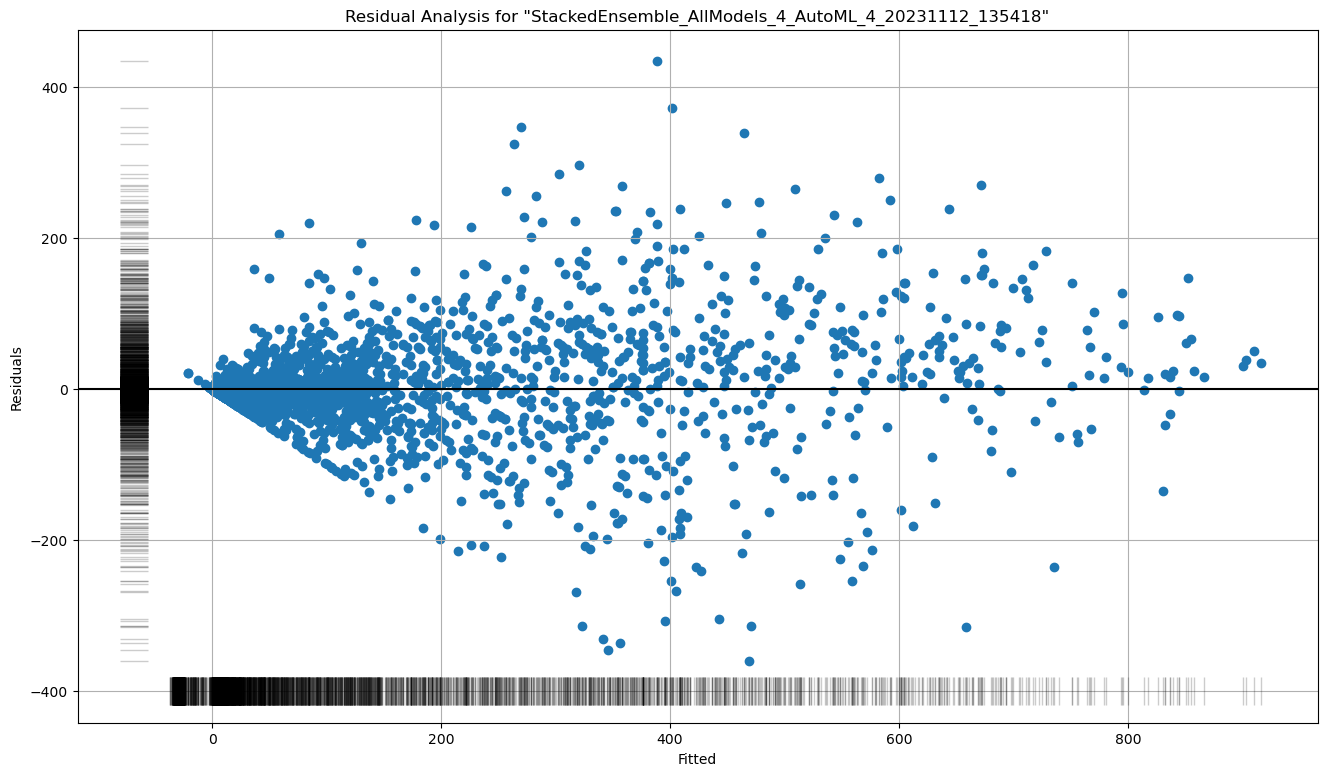

In [4]:
# H2O

all_predictions = pd.DataFrame()
# Init of H2O
h2o.init(max_mem_size = "16G") # If u have more RAM change the parameter

def mean_15minX(X):
    ret = X.drop('date_calc', axis=1, errors='ignore').iloc[:,1:].groupby(np.arange(len(X))//4).mean()
    ret.insert(0, 'date_forecast',list(X.loc[::4, 'date_forecast']))
    return ret

for letter in ['A', 'B', 'C']:
    # Load data
    print(f"Training on dataset {letter}")
    # Load data from Parquet files and concatenate them into a single DataFrame 'X'
    X = mean_15minX(pd.concat([
        pd.read_parquet(f"../../dataset/{letter}/X_train_observed.parquet"),
        pd.read_parquet(f"../../dataset/{letter}/X_train_estimated.parquet")
    ], ignore_index=True))
    y = pd.read_parquet(f"../../dataset/{letter}/train_targets.parquet")
    
    # Preprocess the data

    # Merge DataFrame 'X' and 'y' based on the common column "date_forecast"
    X_y_bacon = X.merge(y, left_on = "date_forecast", right_on = "time")
    
    # Load test data and remove specified columns
    X_test = mean_15minX(pd.read_parquet(f"../../dataset/{letter}/X_test_estimated.parquet"))
    #X_test.drop(columns=columns_to_drop, inplace=True)
    x_test = h2o.H2OFrame(X_test)

    
    # Split data into training and validation frames (80:20)
    train,test = sklearn.model_selection.train_test_split(X_y_bacon, test_size = 0.20, random_state=42)

    train_frame = h2o.H2OFrame(train)
    test_frame = h2o.H2OFrame(test)
    
    x = train_frame.columns[:-1] 
    y = train_frame.columns[-1] 
    
    # Create an AutoML model
    aml = H2OAutoML(max_runtime_secs = 600,
                    sort_metric = "MAE",
                    stopping_metric = "MAE",
                    seed = 7213712285) 
    aml.train(x = x, 
              y = y,
              training_frame = train_frame,
              validation_frame = test_frame)
    
    print(aml.leaderboard)
    best_model = aml.get_best_model(criterion='MAE')
    
    # Make predictions on test data and make CSV file
    prediction1 = best_model.predict(x_test)
    predictions1_df = h2o.as_list(prediction1)
    predictions1_df[predictions1_df < 0.] = 0.
    
    all_predictions = pd.concat([all_predictions, predictions1_df], ignore_index=True)
    all_predictions.to_csv('meanXh2o.csv', index_label='id')
    print("CSV file updated")

# Explain the best model on the validation frame for model interpretation
best_model.explain(test_frame)

# Shut down H2O
h2o.shutdown()
print("Done")